In [1]:
%matplotlib inline 
#import libraries 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import OLS
#from scipy import stats.boxcox, inv_boxcox
import seaborn as sns
from scipy.special import boxcox, inv_boxcox
# special matplotlib argument for improved plots
from matplotlib import rcParams

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#set plot size
#rcParams['figure.figsize'] = [10, 4]

## EDA

In [3]:
df = pd.read_csv('Boston.csv')

In [4]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.199997  4.0900    1  296   
1  0.02731   0.0   7.07     0  0.469  6.421  78.900002  4.9671    2  242   
2  0.02729   0.0   7.07     0  0.469  7.185  61.099998  4.9671    2  242   
3  0.03237   0.0   2.18     0  0.458  6.998  45.799999  6.0622    3  222   
4  0.06905   0.0   2.18     0  0.458  7.147  54.200001  6.0622    3  222   

     PTRATIO           B  LSTAT       MEDV  
0  15.300000  396.899994   4.98  24.000000  
1  17.799999  396.899994   9.14  21.600000  
2  17.799999  392.829987   4.03  34.700001  
3  18.700001  394.630005   2.94  33.400002  
4  18.700001  396.899994   5.33  36.200001

In [5]:
#EDA and Summary Statistics
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976196  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674030   
std     28.148862    2.105710    8.707259  168.537116    2.164946   91.294863   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377487   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440002   
75%     94.074999    5.188425   24.000000  666.000000   20.200001  396.225006   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.899994   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200001  
75%     16.954999   25.000000  
max     37.970001   50.000000

In [6]:
#checking missing data, non missing
df.isnull().values.any()

False

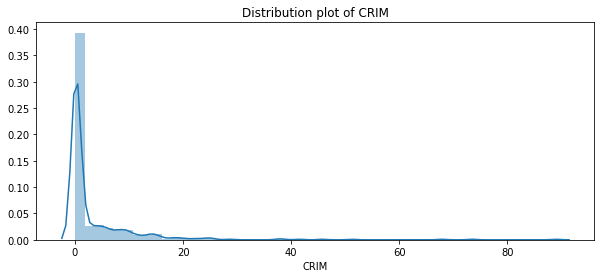

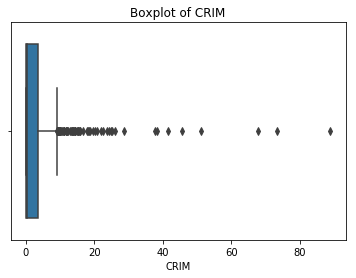

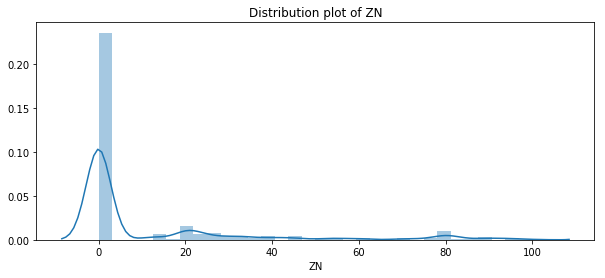

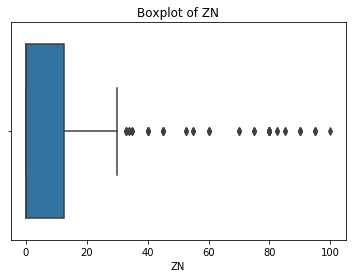

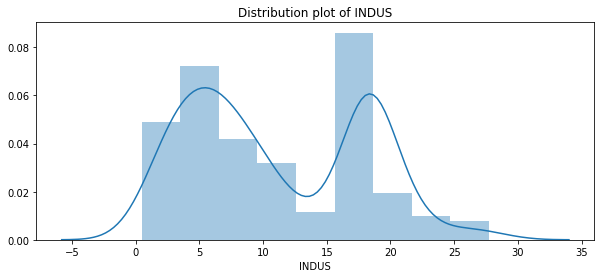

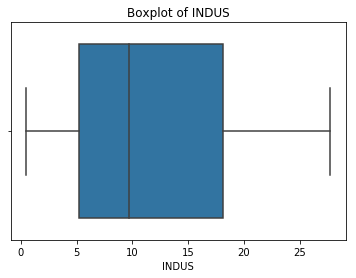

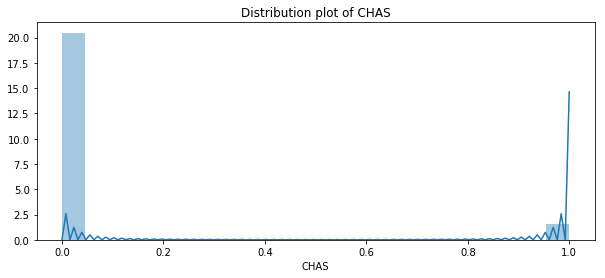

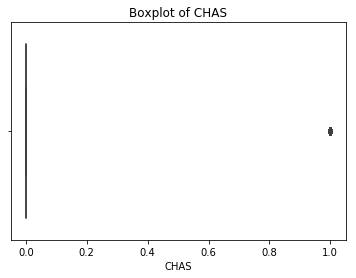

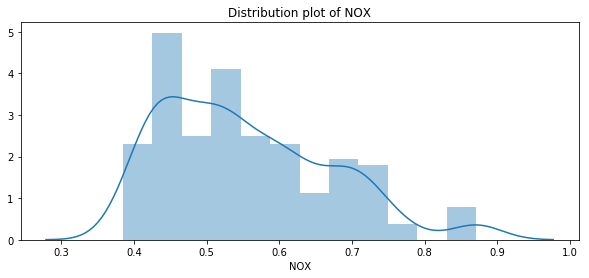

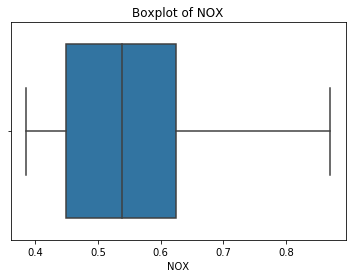

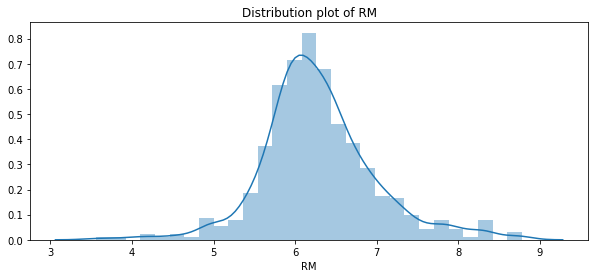

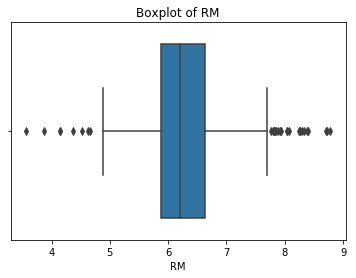

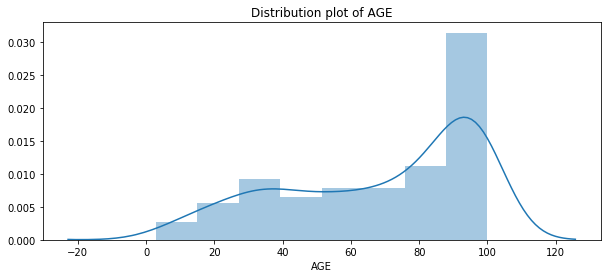

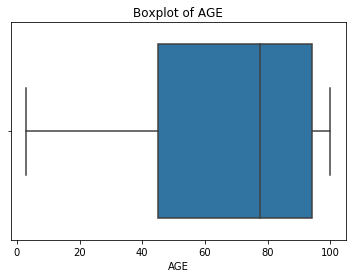

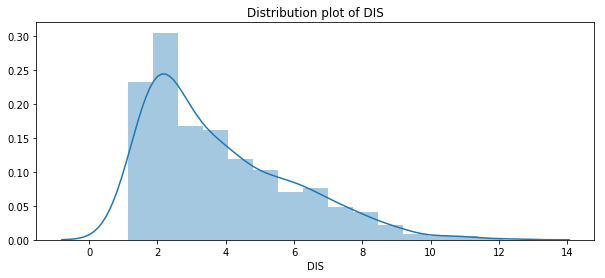

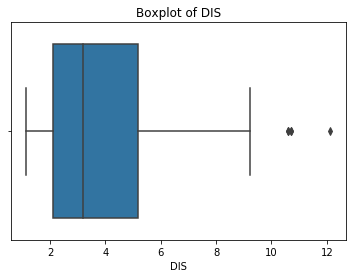

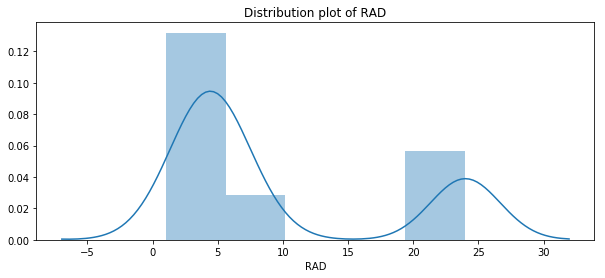

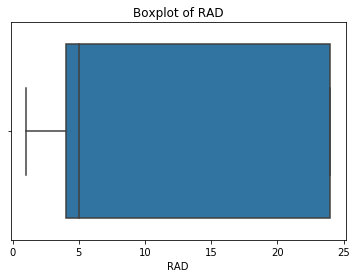

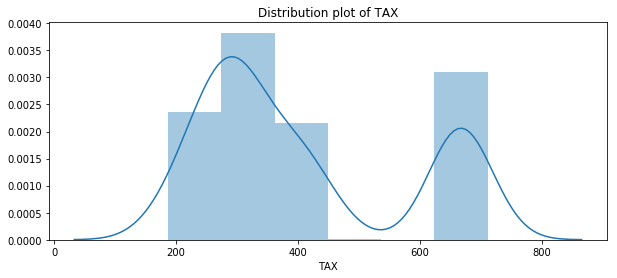

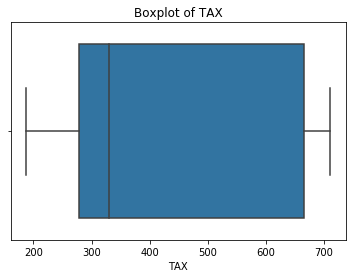

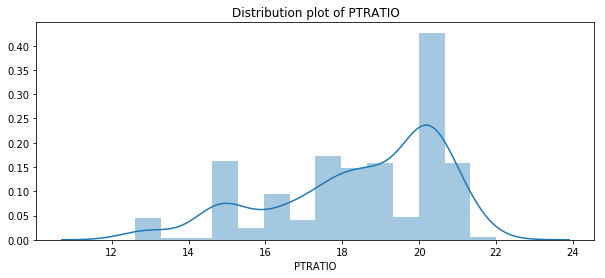

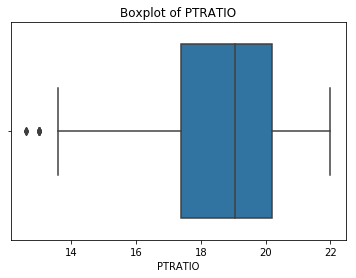

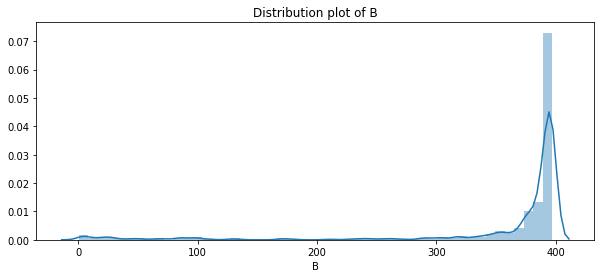

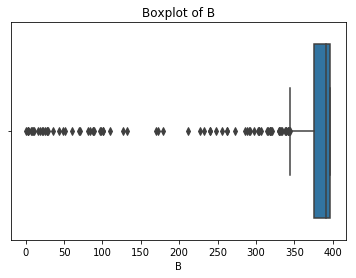

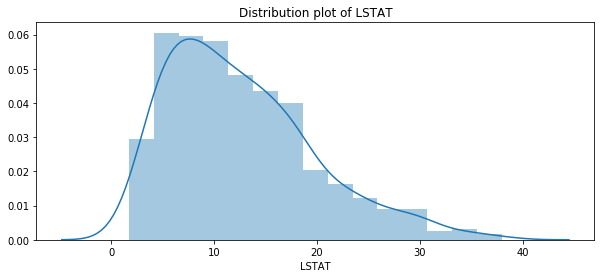

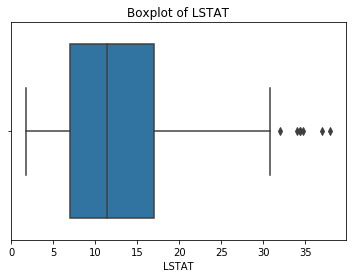

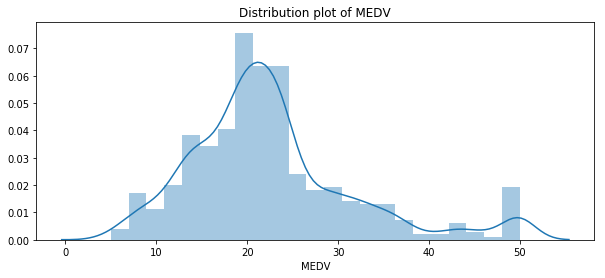

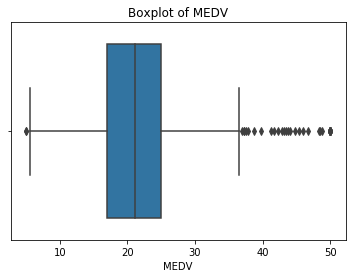

In [7]:
#check distribution for each variable: both predictors and response 
for col in df.columns:
    plt.figure(figsize=(10,4))
    sns.distplot(df[col])
    plt.title('Distribution plot of '+col)
    plt.show();
    sns.boxplot(df[col])
    plt.title('Boxplot of '+col)

In [8]:
# check to confirm the categorical variable 'RAD'
df.RAD.value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

In [9]:
# here 24, 5,  ... 7 are the categorical values of RAD, and 132, 125...7 are corresponding counts 

In [10]:
#Comment on the distributions
#CHAS: binary; RAD: categorical; rest are continuous
#Jessica

## Transformation of Response Variable MEDV and Rest

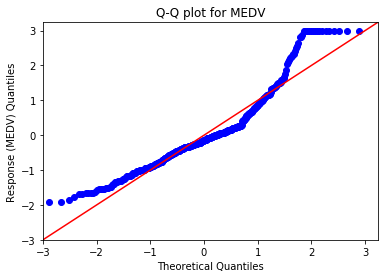

In [11]:
#Check the qq-plot of MEDV variable alone:
sm.qqplot(df['MEDV'], fit= True, line ='45')
plt.ylabel("Response (MEDV) Quantiles")
plt.title('Q-Q plot for MEDV')
plt.show()

In [12]:
#doesn't seem normal, let's do some transformation of Y

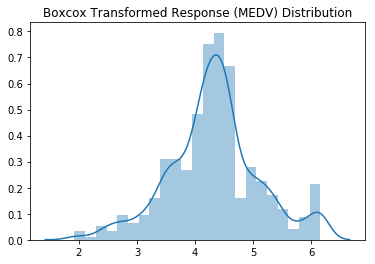

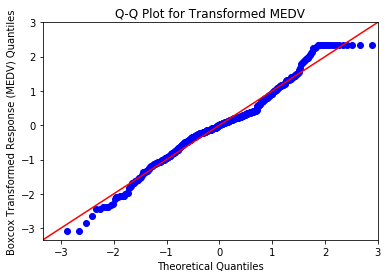

In [13]:
y_trans, _ = stats.boxcox(df['MEDV'])
sns.distplot(y_trans)
plt.title('Boxcox Transformed Response (MEDV) Distribution');
sm.qqplot(y_trans, fit= True, line ='45')
plt.ylabel("Boxcox Transformed Response (MEDV) Quantiles")
plt.title("Q-Q Plot for Transformed MEDV")
plt.show()

In [14]:
#After transformation of y, it looks much normal now, still a bit outliers at the higher end, we'll go with it for now  
#Jessica

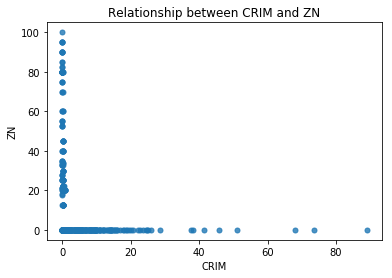

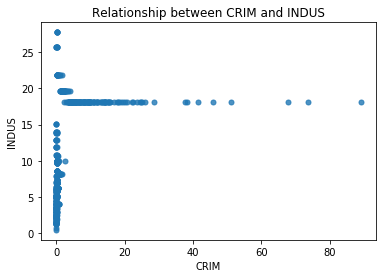

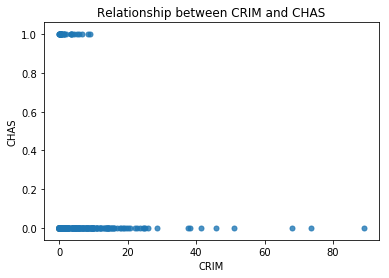

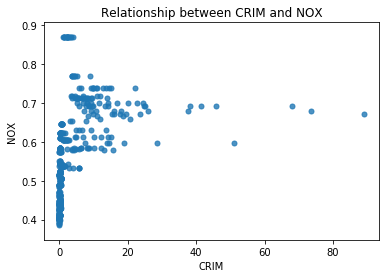

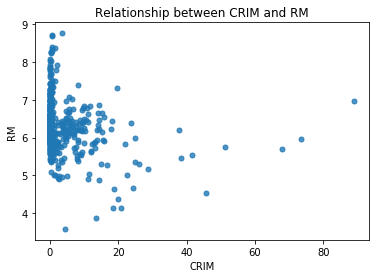

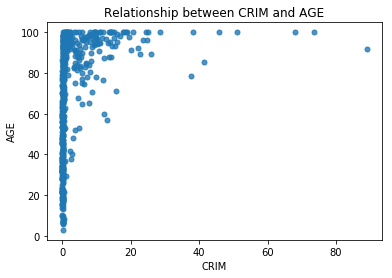

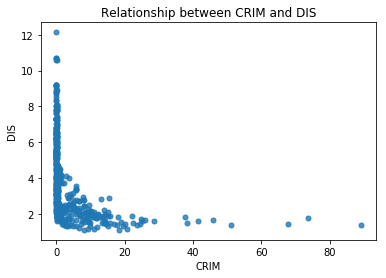

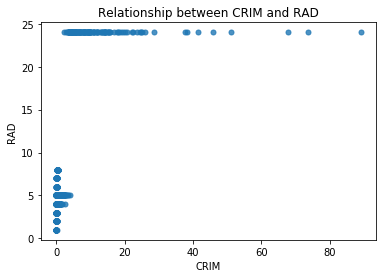

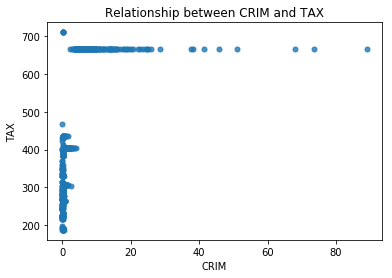

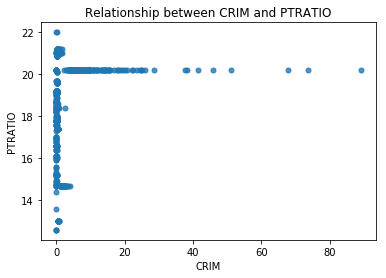

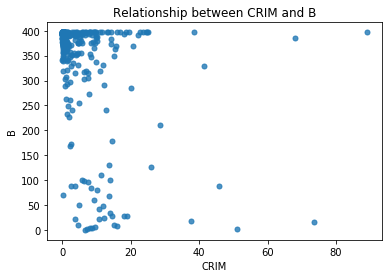

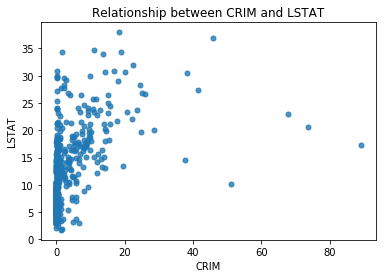

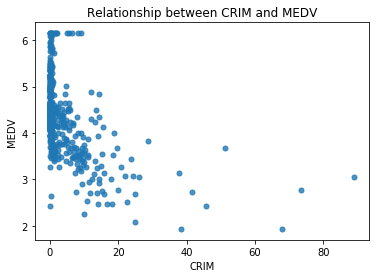

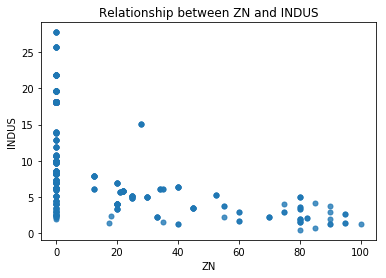

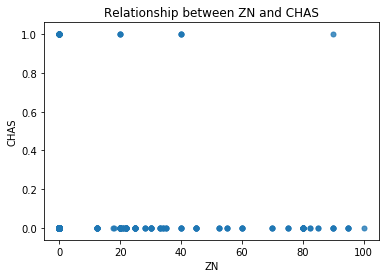

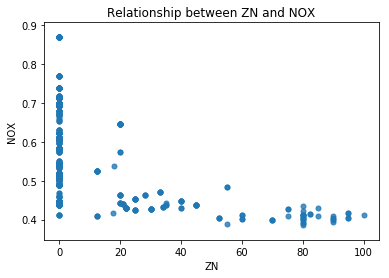

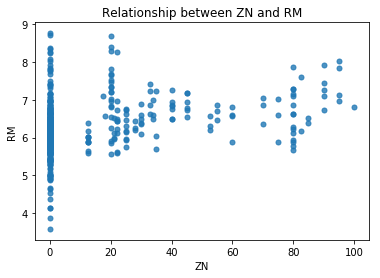

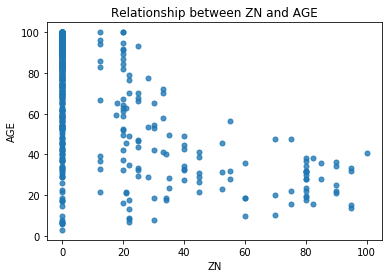

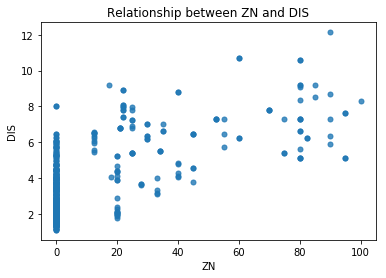

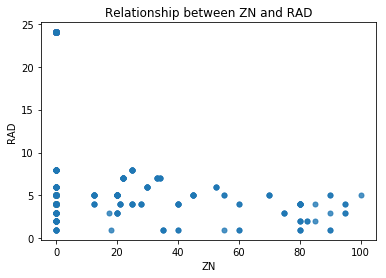

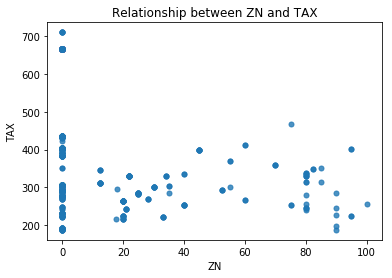

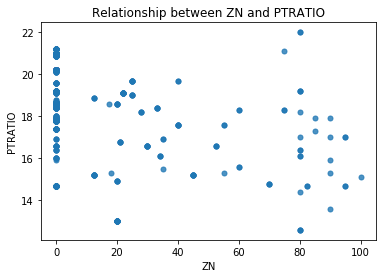

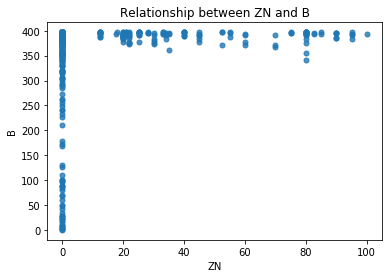

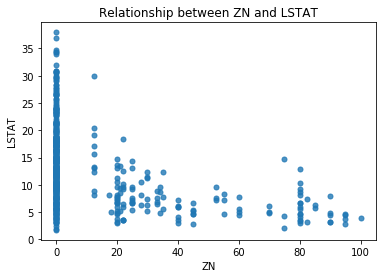

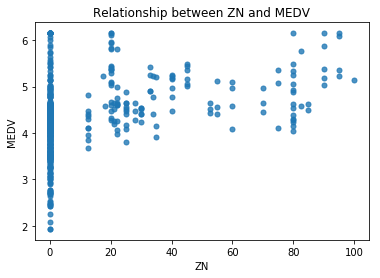

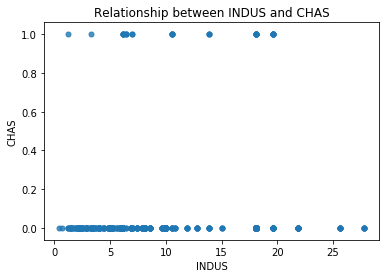

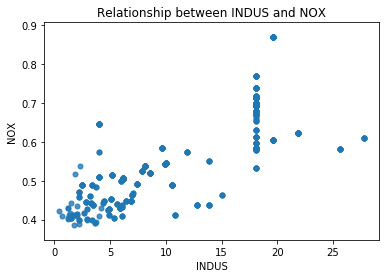

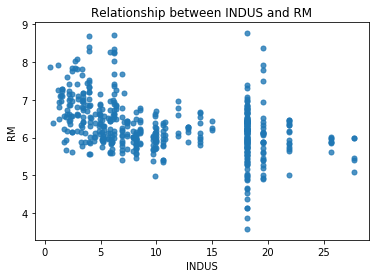

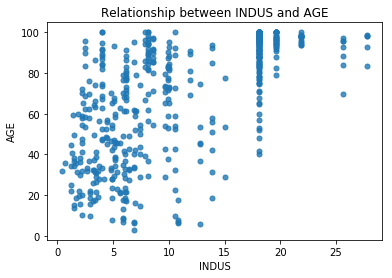

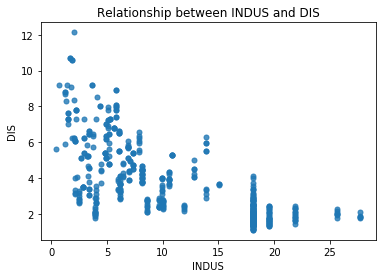

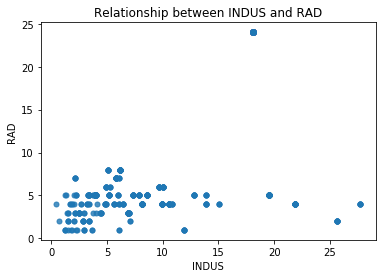

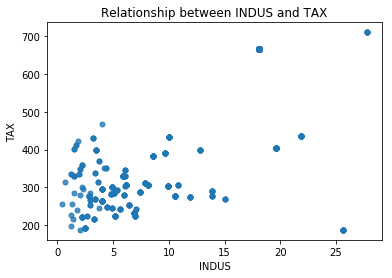

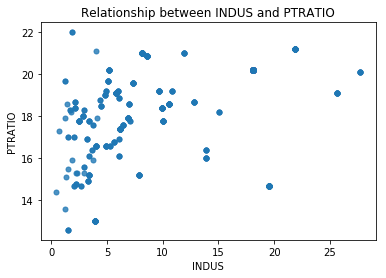

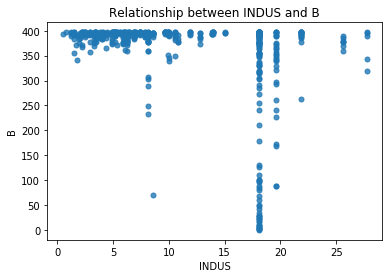

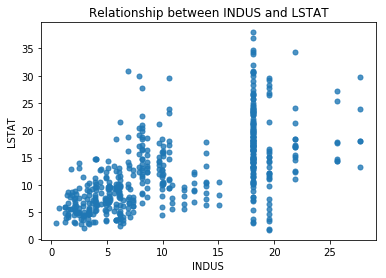

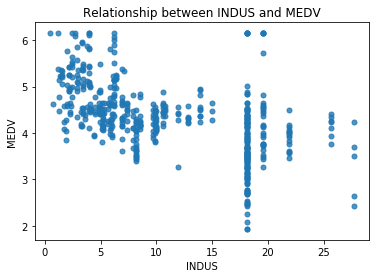

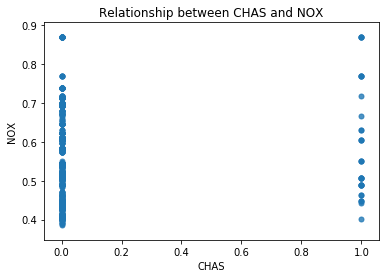

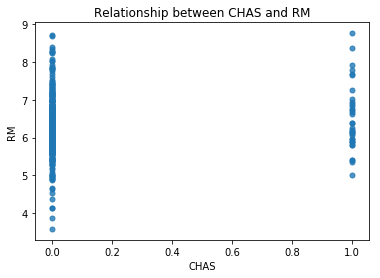

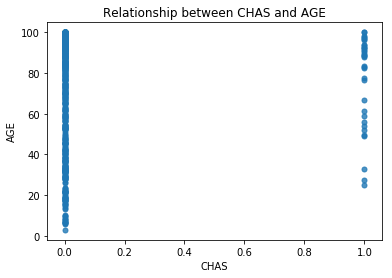

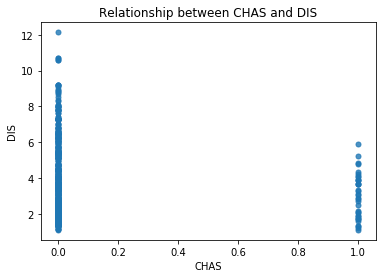

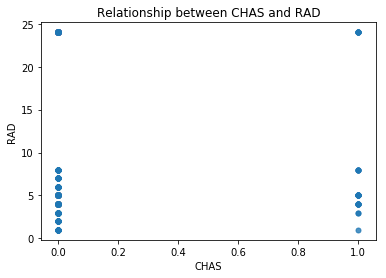

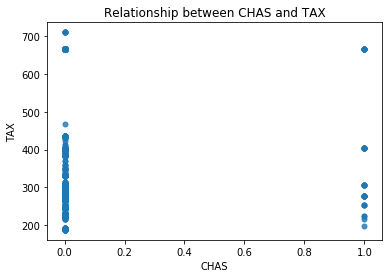

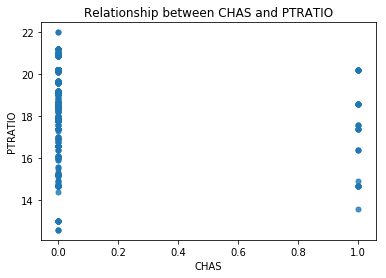

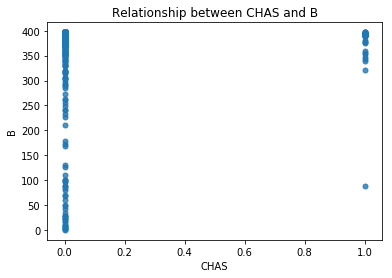

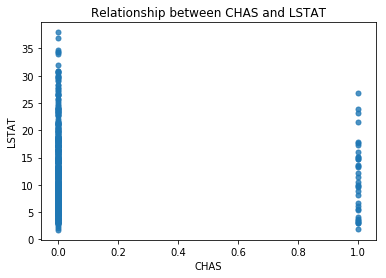

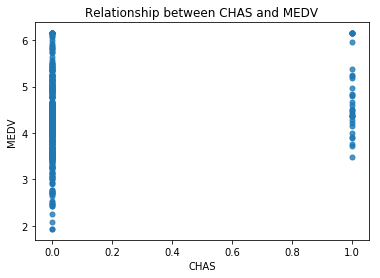

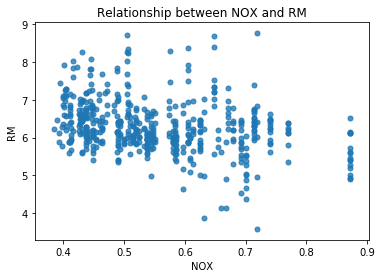

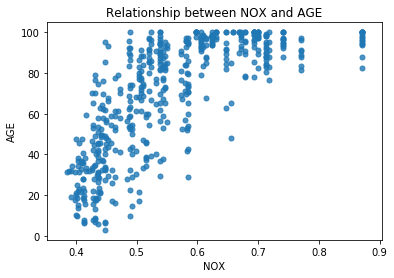

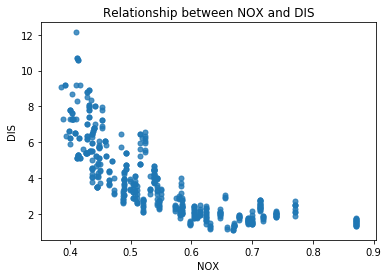

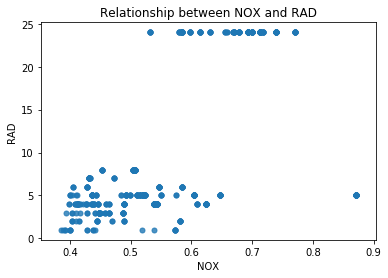

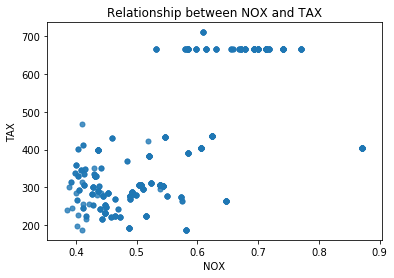

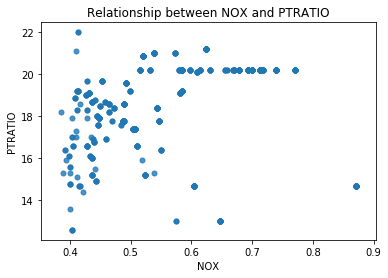

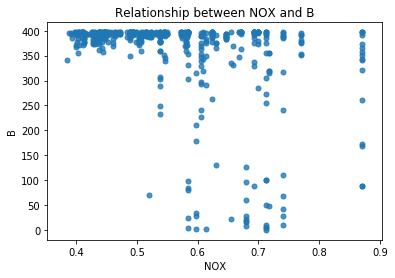

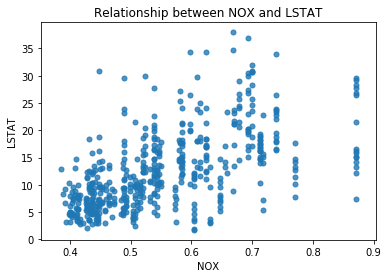

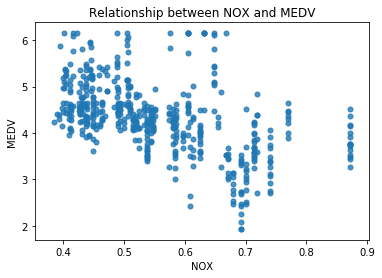

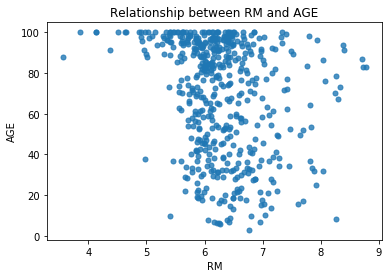

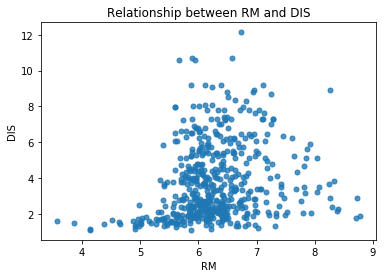

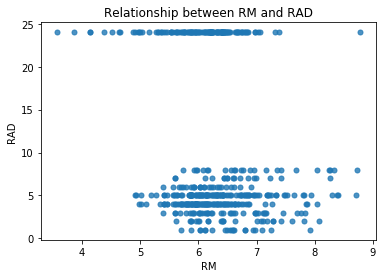

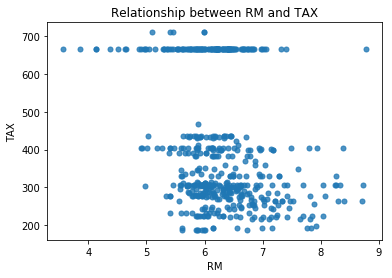

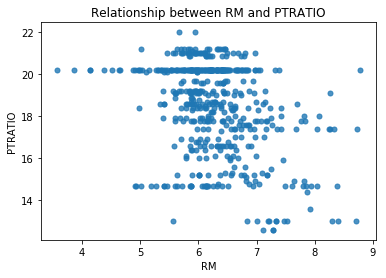

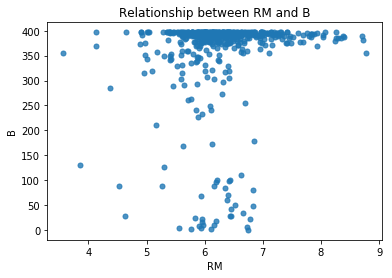

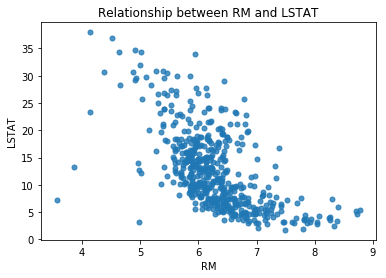

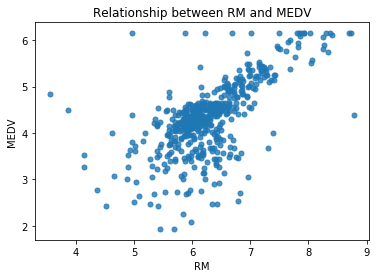

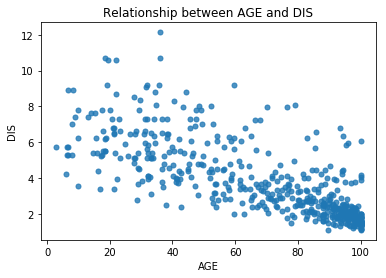

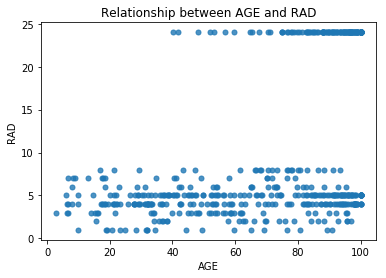

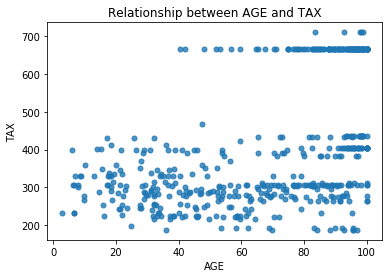

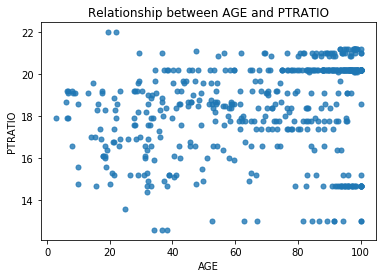

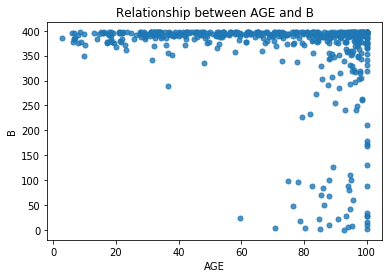

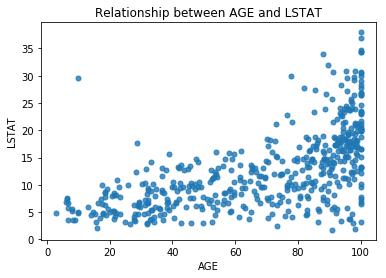

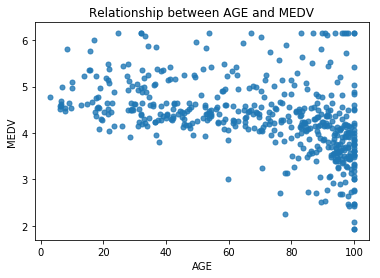

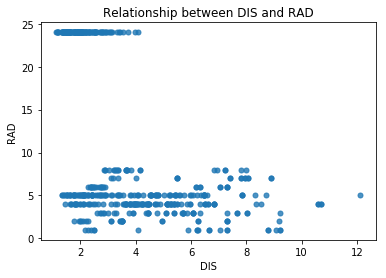

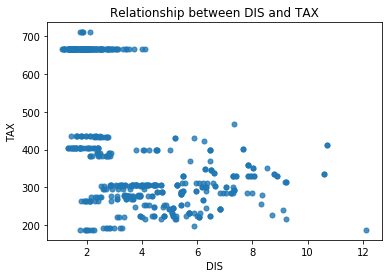

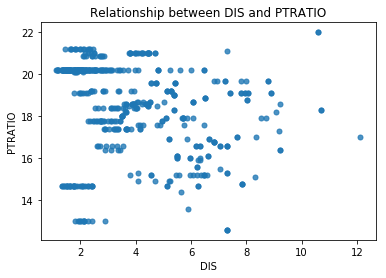

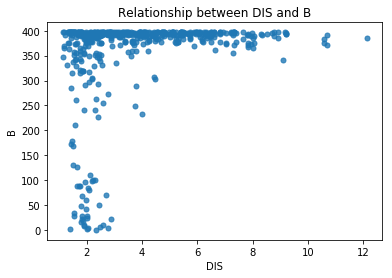

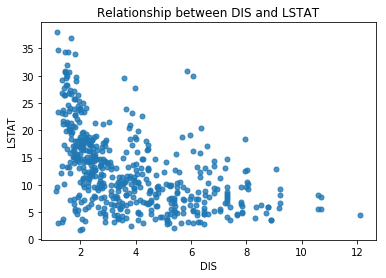

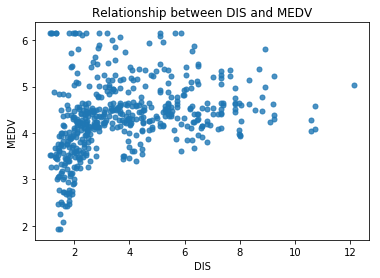

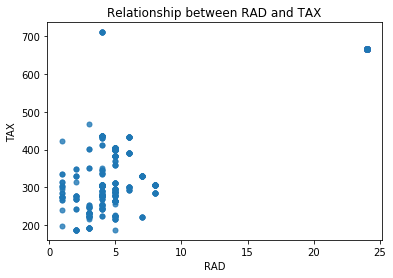

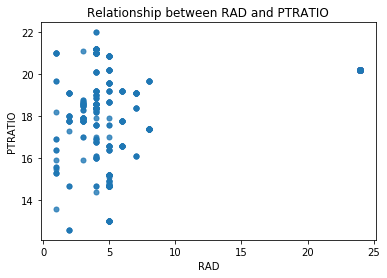

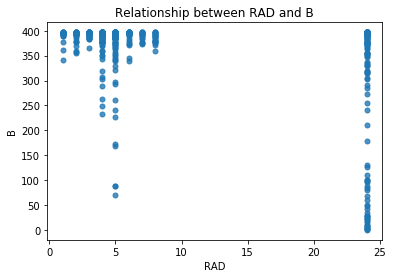

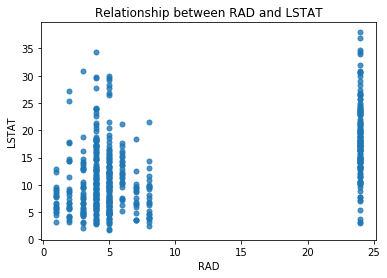

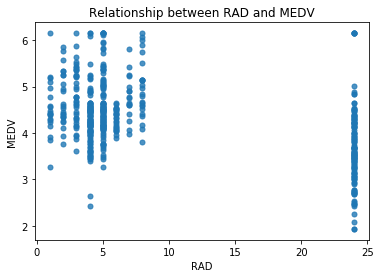

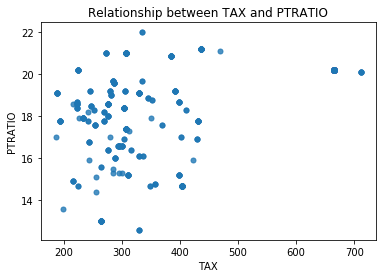

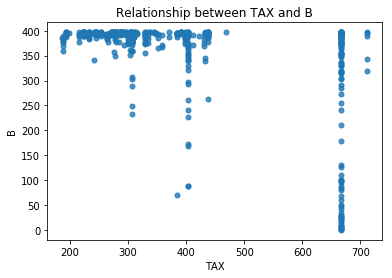

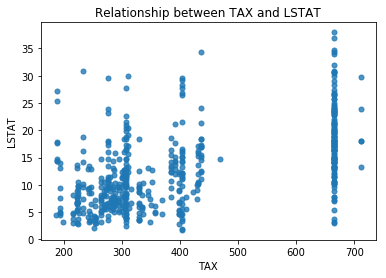

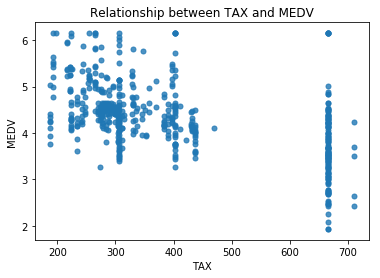

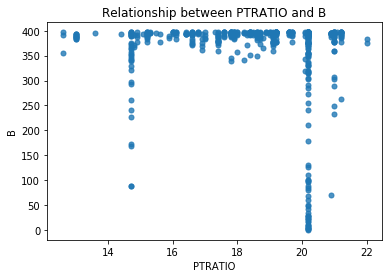

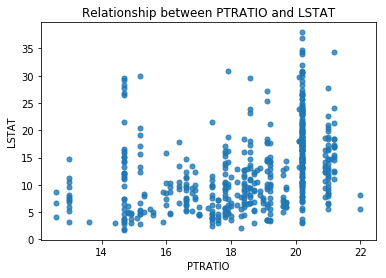

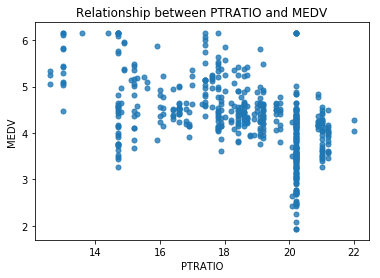

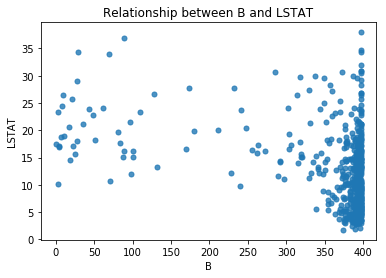

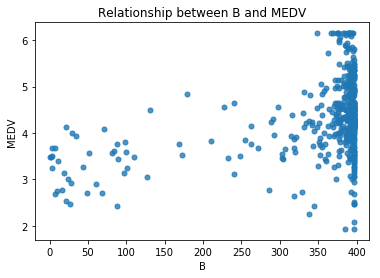

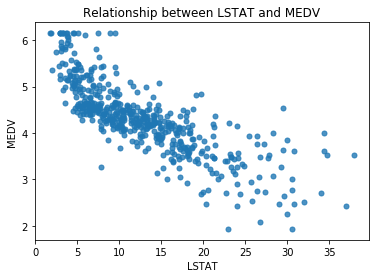

In [15]:
# First put the transformed y back into our data 
df.MEDV = y_trans
# pair-wise scatter plot 
name = df.columns
for i in range(14):
    for j in range(i+1,14):
        plt.scatter(df[name[i]], df[name[j]], s = 25, alpha = 0.8)
        plt.xlabel(str(name[i]))
        plt.ylabel(str(name[j]))
        plt.title("Relationship between "+ name[i] + " and " +name[j]) 
        plt.show();

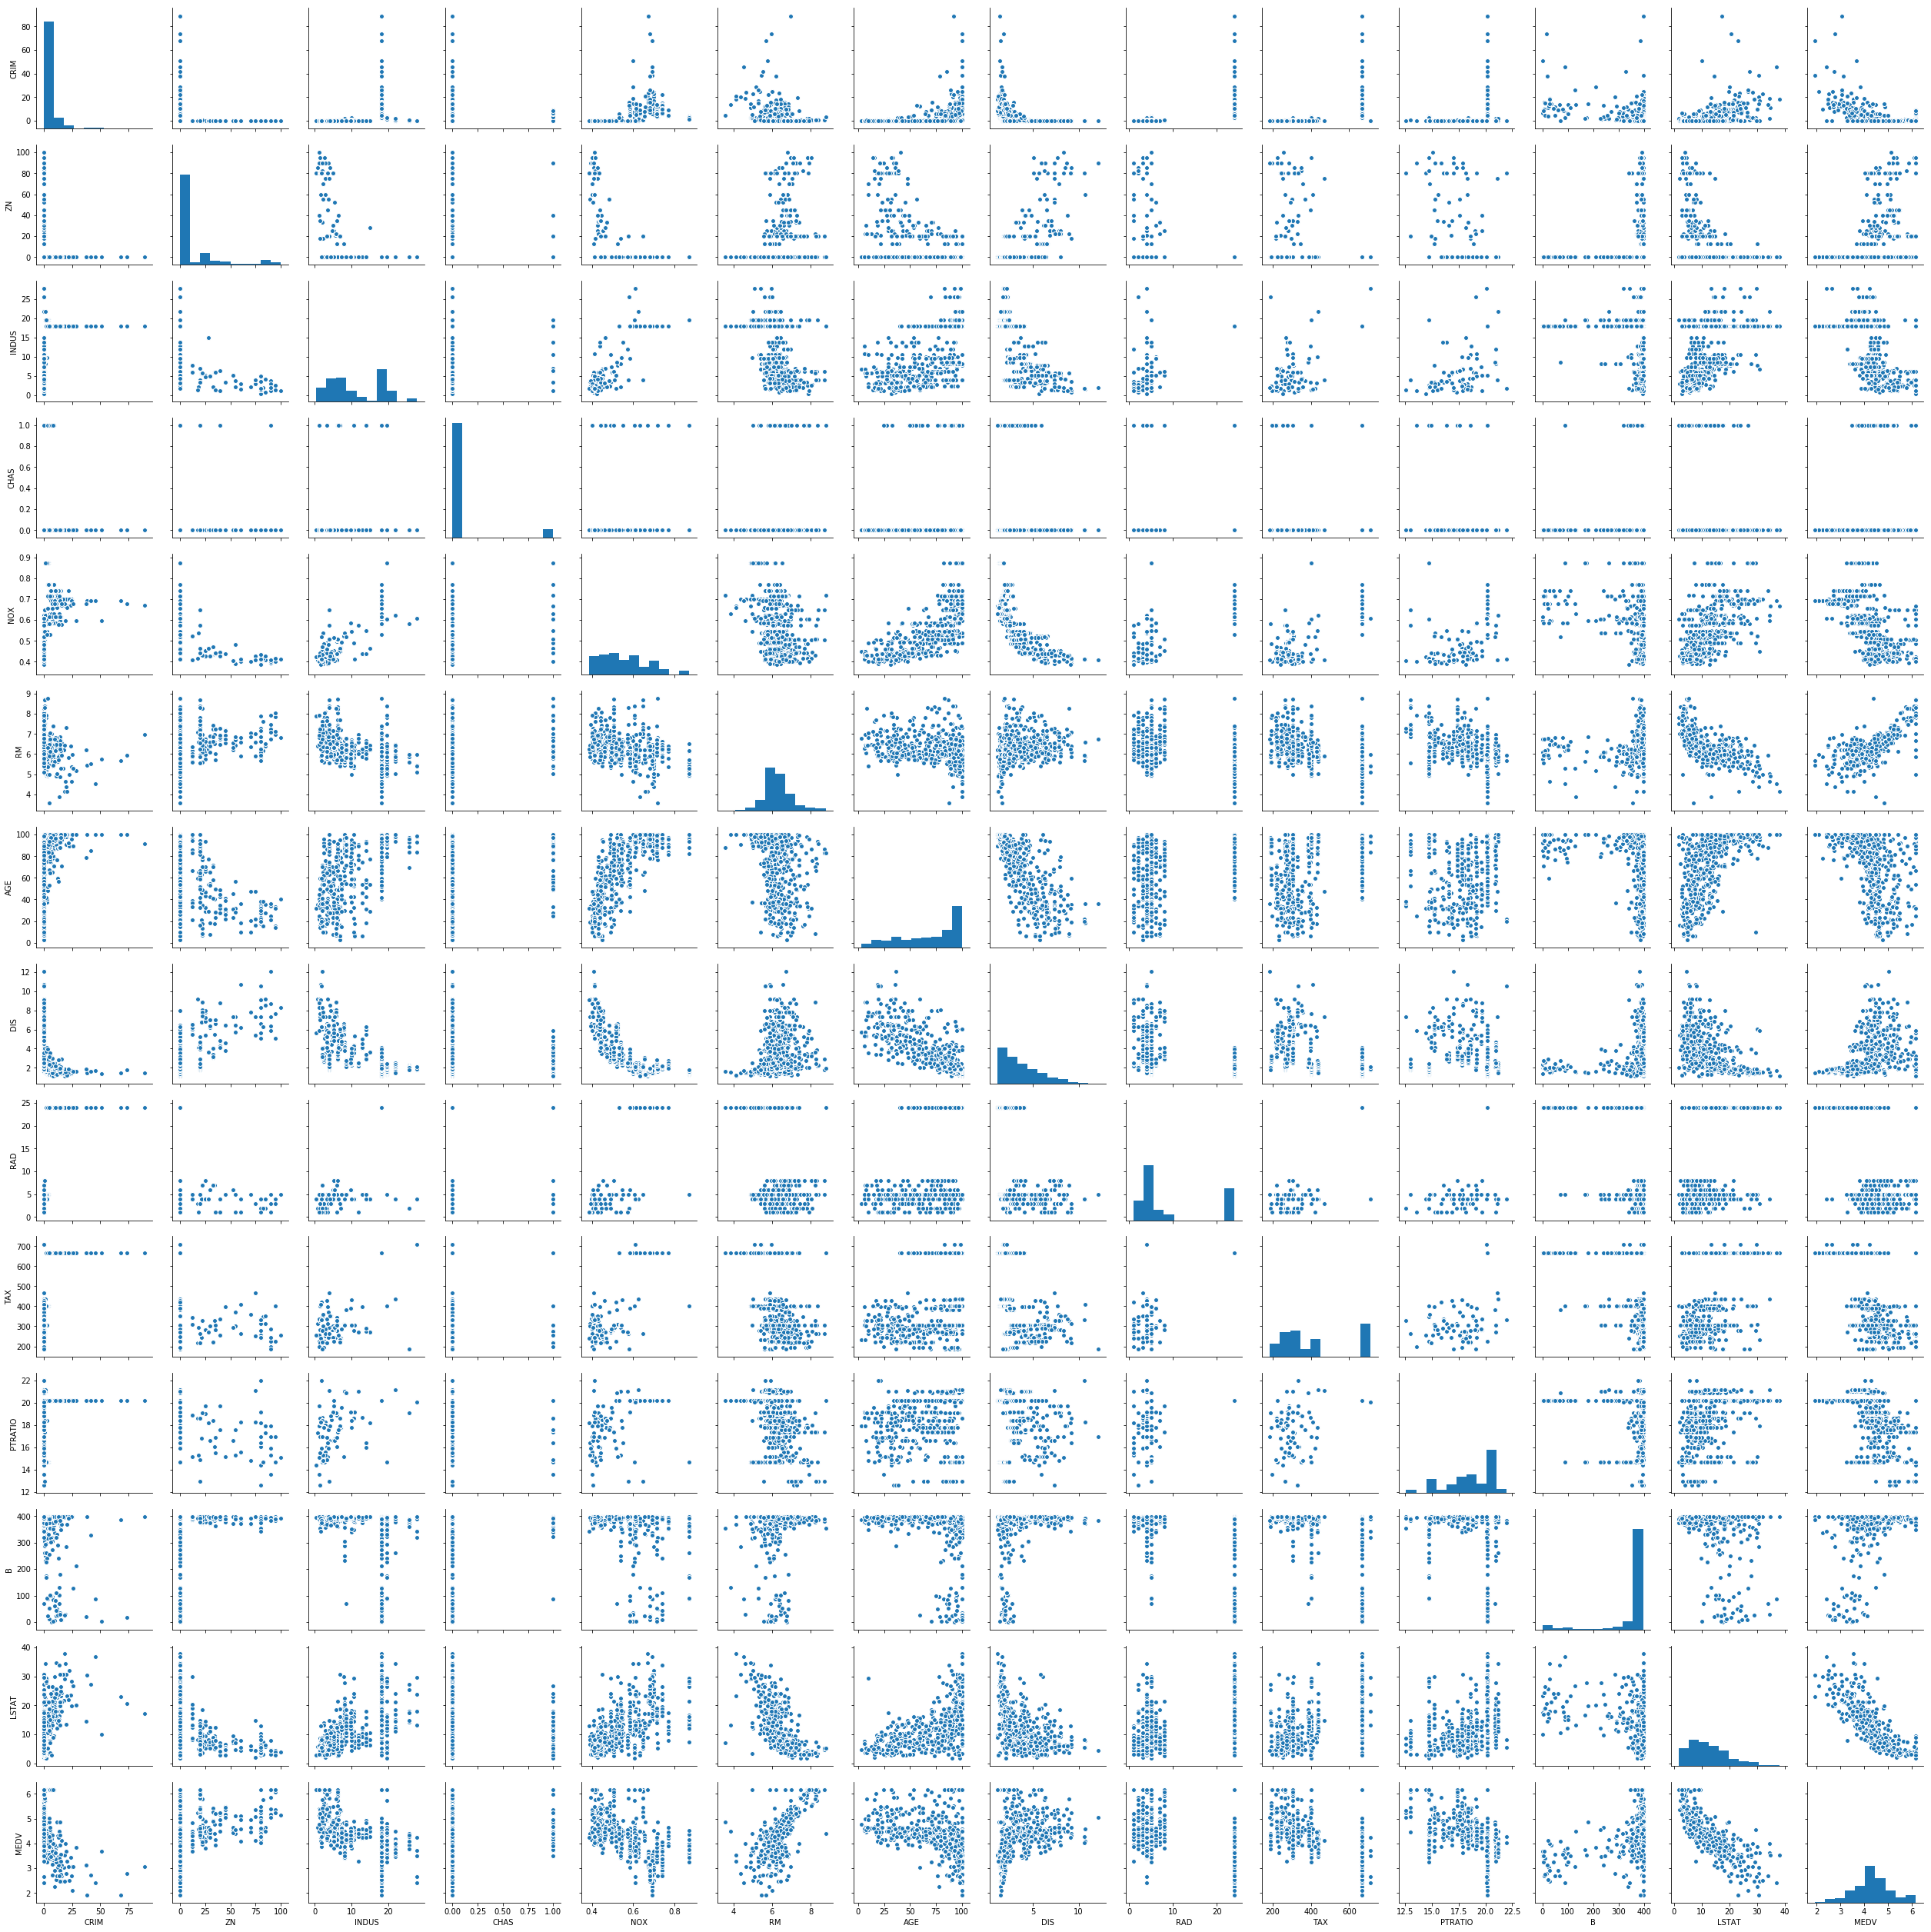

In [16]:
#show them all together 
sns.pairplot(df[df.columns])
plt.show();

In [17]:
#Comment on the pairwise scatterplots
#notice the pattern of each variable with MEDV
#collinearity between 2 predictor variables 
#you can use either bigger graph, or the smaller stacked matrix graph
#Jessica 

CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
CRIM     1.000000 -0.200469  0.406583  0.420972 -0.219247  0.352734 -0.379670   
ZN      -0.200469  1.000000 -0.533828 -0.516604  0.311991 -0.569537  0.664408   
INDUS    0.406583 -0.533828  1.000000  0.763651 -0.391676  0.644779 -0.708027   
NOX      0.420972 -0.516604  0.763651  1.000000 -0.302188  0.731470 -0.769230   
RM      -0.219247  0.311991 -0.391676 -0.302188  1.000000 -0.240265  0.205246   
AGE      0.352734 -0.569537  0.644779  0.731470 -0.240265  1.000000 -0.747881   
DIS     -0.379670  0.664408 -0.708027 -0.769230  0.205246 -0.747881  1.000000   
TAX      0.582764 -0.314563  0.720760  0.668023 -0.292048  0.506456 -0.534432   
PTRATIO  0.289946 -0.391679  0.383248  0.188933 -0.355502  0.261515 -0.232471   
B       -0.385064  0.175520 -0.356977 -0.380051  0.128069 -0.273534  0.291512   
LSTAT    0.455621 -0.412995  0.603800  0.590879 -0.613808  0.602339 -0.496996   
MEDV    -0.498834  0.367574 -0.535359 -0.498263  0.652548 -0.442584  0.326221   

              TAX   PTRATIO         B     LSTAT      MEDV  
CRIM     0.582764  0.289946 -0.385064  0.455621 -0.498834  
ZN      -0.314563 -0.391679  0.175520 -0.412995  0.367574  
INDUS    0.720760  0.383248 -0.356977  0.603800 -0.535359  
NOX      0.668023  0.188933 -0.380051  0.590879 -0.498263  
RM      -0.292048 -0.355502  0.128069 -0.613808  0.652548  
AGE      0.506456  0.261515 -0.273534  0.602339 -0.442584  
DIS     -0.534432 -0.232471  0.291512 -0.496996  0.326221  
TAX      1.000000  0.460853 -0.441808  0.543993 -0.546439  
PTRATIO  0.460853  1.000000 -0.177383  0.374044 -0.508593  
B       -0.441808 -0.177383  1.000000 -0.366087  0.391402  
LSTAT    0.543993  0.374044 -0.366087  1.000000 -0.797763  
MEDV    -0.546439 -0.508593  0.391402 -0.797763  1.000000

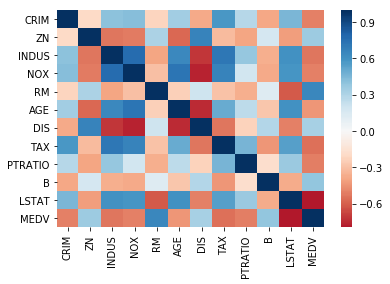

In [18]:
#check the correlation coefficient for continuous varaibles  
df_cont = df.drop(['CHAS','RAD'],axis =1)
display(df_cont.corr(method ="pearson"))
sns.heatmap(df_cont.corr(method ="pearson"), cmap= 'RdBu', center = 0);

In [19]:
#Dark blue and dark red should be of concern, highly correlated 
#of concern: should be DIS vs INDUS, DIS vs NOX, DIS vs AGE, NOX vs INDUS, NOX vs AGE, TAX vs INDUS
#need to check multicollineary afterwards with VIF when building models
#Jessica

In [20]:
# Transform the categorical RAD to dummies
df_1 = pd.get_dummies(df, columns = ['RAD'], drop_first=True)
print(df_1.shape)
display(df_1.head())
df_1.columns 

(506, 21)


CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.199997  4.0900  296   
1  0.02731   0.0   7.07     0  0.469  6.421  78.900002  4.9671  242   
2  0.02729   0.0   7.07     0  0.469  7.185  61.099998  4.9671  242   
3  0.03237   0.0   2.18     0  0.458  6.998  45.799999  6.0622  222   
4  0.06905   0.0   2.18     0  0.458  7.147  54.200001  6.0622  222   

     PTRATIO   ...    LSTAT      MEDV  RAD_2  RAD_3  RAD_4  RAD_5  RAD_6  \
0  15.300000   ...     4.98  4.572937      0      0      0      0      0   
1  17.799999   ...     9.14  4.365582      1      0      0      0      0   
2  17.799999   ...     4.03  5.336943      1      0      0      0      0   
3  18.700001   ...     2.94  5.254955      0      1      0      0      0   
4  18.700001   ...     5.33  5.428607      0      1      0      0      0   

   RAD_7  RAD_8  RAD_24  
0      0      0       0  
1      0      0       0  
2      0      0       0  
3      0      0       0  
4      0      0       0  

[5 rows x 21 columns]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'RAD_2', 'RAD_3', 'RAD_4', 'RAD_5',
       'RAD_6', 'RAD_7', 'RAD_8', 'RAD_24'],
      dtype='object')

## Split Data into Training and Test

In [21]:
#train:valid = 0.8:0.2
train=df_1.sample(frac=0.8,random_state=200)
test =df_1.drop(train.index)
#take a look at the split samples 
display(train.head())
print(train.shape)#shape tells you the dimensions
print(test.shape)

CRIM   ZN  INDUS  CHAS    NOX     RM        AGE     DIS  TAX  \
207   0.25199  0.0  10.59     0  0.489  5.783  72.699997  4.3549  277   
13    0.62976  0.0   8.14     0  0.538  5.949  61.799999  4.7075  307   
22    1.23247  0.0   8.14     0  0.538  6.142  91.699997  3.9769  307   
369   5.66998  0.0  18.10     1  0.631  6.683  96.800003  1.3567  666   
444  12.80230  0.0  18.10     0  0.740  5.854  96.599998  1.8956  666   

       PTRATIO   ...        LSTAT      MEDV  RAD_2  RAD_3  RAD_4  RAD_5  \
207  18.600000   ...    18.059999  4.445361      0      0      1      0   
13   21.000000   ...     8.260000  4.255056      0      0      1      0   
22   21.000000   ...    18.719999  3.707249      0      0      1      0   
369  20.200001   ...     3.730000  6.156527      0      0      0      0   
444  20.200001   ...    23.790001  3.113308      0      0      0      0   

     RAD_6  RAD_7  RAD_8  RAD_24  
207      0      0      0       0  
13       0      0      0       0  
22       0      0      0       0  
369      0      0      0       1  
444      0      0      0       1  

[5 rows x 21 columns]

(405, 21)
(101, 21)


## Preliminary Model Fitting

In [22]:
#Model 1 with all variables: preliminary, everything first order, include all variables
#ols: ordinary least square
from statsmodels.formula.api import ols
m = ols("""MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + TAX + PTRATIO + B + LSTAT 
        + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7+ RAD_8 + RAD_24""",train).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     74.67
Date:                Wed, 25 Apr 2018   Prob (F-statistic):          7.33e-119
Time:                        17:52:58   Log-Likelihood:                -159.29
No. Observations:                 405   AIC:                             360.6
Df Residuals:                     384   BIC:                             444.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1753      0.479     12.886      0.0

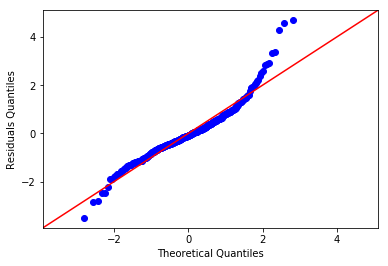

In [23]:
#Q-Q plot for residuals 
res = m.resid
sm.qqplot(res, fit= True, line ='45')
plt.ylabel("Residuals Quantiles")
plt.show()

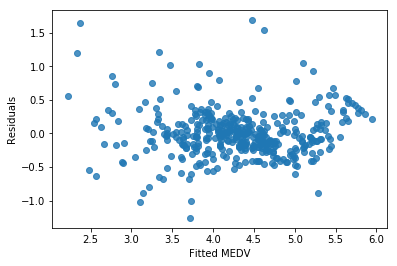

In [24]:
# residuals vs fitted values 
fitted=m.fittedvalues 
sns.regplot(x= fitted, y= res, fit_reg = False)
plt.xlabel('Fitted MEDV')
plt.ylabel('Residuals')
plt.show();

In [25]:
# Not normal based on Q-Q plot,not very constant variance based on residuals vs fitted 
# Comment on model adjusted R2, F, AIC, lots of big P-values for coefficient
# Your analysis here 

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from patsy import dmatrices 
y_pre, X_pre = dmatrices("""MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + TAX + PTRATIO + B + LSTAT 
        + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7+ RAD_8 + RAD_24""", train, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X_pre.values, i) for i in range(X_pre.shape[1])]
vif["features"] = X_pre.columns
display(vif)

VIF Factor   features
0   685.914775  Intercept
1     1.725968       CRIM
2     2.397799         ZN
3     4.211139      INDUS
4     1.110179       CHAS
5     4.678186        NOX
6     2.038612         RM
7     3.150262        AGE
8     4.216562        DIS
9     9.682975        TAX
10    2.185475    PTRATIO
11    1.307623          B
12    2.902448      LSTAT
13    2.595047      RAD_2
14    3.005417      RAD_3
15    6.974421      RAD_4
16    6.961980      RAD_5
17    2.858525      RAD_6
18    2.207625      RAD_7
19    2.989861      RAD_8
20   15.323867     RAD_24

In [27]:
#VIF >10 indicates serious multicollenarity, investigate from intercept 
#Jessica 

## Backward Step-wise Selection

In [28]:
#drop intercept first 
m_0 = ols("""MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + TAX + PTRATIO + B + LSTAT 
        + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7+ RAD_8 + RAD_24 -1 """,train).fit()
print(m_0.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1978.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:52:59   Log-Likelihood:                -232.06
No. Observations:                 405   AIC:                             504.1
Df Residuals:                     385   BIC:                             584.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0157      0.003     -4.907      0.0

In [29]:
y_0, X_0 = dmatrices("""MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + TAX + PTRATIO + B + LSTAT 
        + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7+ RAD_8 + RAD_24 -1""", train, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X_0.values, i) for i in range(X_0.shape[1])]
vif["features"] = X_0.columns
display(vif)

VIF Factor features
0     2.014187     CRIM
1     2.916265       ZN
2    15.740246    INDUS
3     1.191519     CHAS
4    89.204591      NOX
5    89.098078       RM
6    22.008144      AGE
7    16.037246      DIS
8    65.758134      TAX
9   104.448204  PTRATIO
10   20.195190        B
11   11.234806    LSTAT
12    2.537249    RAD_2
13    3.004557    RAD_3
14    8.630612    RAD_4
15    8.023170    RAD_5
16    2.823747    RAD_6
17    2.267719    RAD_7
18    3.087794    RAD_8
19   20.844974   RAD_24

In [30]:
#drop INDUS cuz largest p-value and large VIF
#comment on AIC, F, and adjusted R2 
#Jessica 

In [31]:
#drop INDUS 
m_1 = ols("""MEDV ~ CRIM + ZN + CHAS + NOX + RM + AGE + DIS + TAX + PTRATIO + B + LSTAT  
        + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7+ RAD_8 + RAD_24 - 1""", train).fit()
print(m_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2084.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:52:59   Log-Likelihood:                -232.41
No. Observations:                 405   AIC:                             502.8
Df Residuals:                     386   BIC:                             578.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0158      0.003     -4.950      0.0

In [32]:
#full vs reduced F-stats
from statsmodels.stats.anova import anova_lm
anova_lm(m_1,m_0)

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


df_resid        ssr  df_diff   ss_diff         F    Pr(>F)
0     386.0  74.717902      0.0       NaN       NaN       NaN
1     385.0  74.589277      1.0  0.128626  0.663914  0.415685

In [33]:
y_1, X_1 = dmatrices("""MEDV ~ CRIM + ZN + CHAS + NOX + RM + AGE + DIS + TAX + PTRATIO + B + LSTAT 
        + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7+ RAD_8 + RAD_24 - 1""", train, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X_1.values, i) for i in range(X_1.shape[1])]
vif["features"] = X_1.columns
display(vif)

VIF Factor features
0     2.010396     CRIM
1     2.842899       ZN
2     1.184530     CHAS
3    82.581623      NOX
4    87.158166       RM
5    22.007109      AGE
6    15.258969      DIS
7    53.017319      TAX
8   104.409038  PTRATIO
9    20.171231        B
10   11.205990    LSTAT
11    2.437711    RAD_2
12    3.004524    RAD_3
13    8.594906    RAD_4
14    8.005713    RAD_5
15    2.791684    RAD_6
16    2.267701    RAD_7
17    3.068536    RAD_8
18   20.262733   RAD_24

In [34]:
# comment: AIC doesn't decrease much, adjusted R2 doesn't improve, F stats, cannot reject 'reduced model is better'
# drop TAX because p-value is big and VIF is big 

In [35]:
#drop TAX
m_2 = ols("""MEDV ~ CRIM + ZN + CHAS + NOX + RM + AGE + DIS + PTRATIO + B + LSTAT  
        + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7+ RAD_8 + RAD_24 - 1""", train).fit()
print(m_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2202.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:52:59   Log-Likelihood:                -232.71
No. Observations:                 405   AIC:                             501.4
Df Residuals:                     387   BIC:                             573.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0158      0.003     -4.936      0.0

In [36]:
anova_lm(m_2,m_1)

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


df_resid        ssr  df_diff   ss_diff         F    Pr(>F)
0     387.0  74.828639      0.0       NaN       NaN       NaN
1     386.0  74.717902      1.0  0.110736  0.572075  0.449897

In [37]:
y_2, X_2 = dmatrices("""MEDV ~ CRIM + ZN + CHAS + NOX + RM + AGE + DIS + PTRATIO + B + LSTAT  
        + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7+ RAD_8 + RAD_24 - 1""", train, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X_2.values, i) for i in range(X_2.shape[1])]
vif["features"] = X_2.columns
display(vif)

VIF Factor features
0     2.009347     CRIM
1     2.803787       ZN
2     1.181649     CHAS
3    76.449281      NOX
4    87.130082       RM
5    21.939065      AGE
6    15.258022      DIS
7    99.447935  PTRATIO
8    20.169312        B
9    11.179075    LSTAT
10    2.411746    RAD_2
11    2.980281    RAD_3
12    8.536899    RAD_4
13    7.970184    RAD_5
14    2.704813    RAD_6
15    2.263549    RAD_7
16    3.066131    RAD_8
17   13.649748   RAD_24

In [38]:
#Comment: AIC decreases a bit (good), F, but adjusted R2 still same
#drop AGE cuz big p-value and VIF 
#jessica

In [39]:
#drop AGE
m_3 = ols("""MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + PTRATIO + B + LSTAT  
        + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7+ RAD_8 + RAD_24 - 1""", train).fit()
print(m_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2332.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:52:59   Log-Likelihood:                -233.16
No. Observations:                 405   AIC:                             500.3
Df Residuals:                     388   BIC:                             568.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0158      0.003     -4.938      0.0

In [40]:
anova_lm(m_3,m_2)

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


df_resid        ssr  df_diff   ss_diff         F    Pr(>F)
0     388.0  74.995557      0.0       NaN       NaN       NaN
1     387.0  74.828639      1.0  0.166918  0.863268  0.353405

In [41]:
y_3, X_3 = dmatrices("""MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + PTRATIO + B + LSTAT  
        + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7+ RAD_8 + RAD_24 - 1""", train, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X_3.values, i) for i in range(X_3.shape[1])]
vif["features"] = X_3.columns
display(vif)

VIF Factor features
0     2.009344     CRIM
1     2.783606       ZN
2     1.178631     CHAS
3    71.316142      NOX
4    84.415486       RM
5    13.310723      DIS
6    98.594592  PTRATIO
7    20.145110        B
8     9.851971    LSTAT
9     2.411684    RAD_2
10    2.960288    RAD_3
11    8.505765    RAD_4
12    7.967007    RAD_5
13    2.697263    RAD_6
14    2.251018    RAD_7
15    3.063265    RAD_8
16   13.575539   RAD_24

In [42]:
# Comment on AIC, F and Ajusted R2
# drop DIS cuz large p-value and VIF 
# Jessica 

In [43]:
#drop DIS
m_4 = ols("""MEDV ~ CRIM + ZN + CHAS + NOX + RM + PTRATIO + B + LSTAT  
        + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7+ RAD_8 + RAD_24 - 1""", train).fit()
print(m_4.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2474.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:52:59   Log-Likelihood:                -233.98
No. Observations:                 405   AIC:                             500.0
Df Residuals:                     389   BIC:                             564.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0154      0.003     -4.843      0.0

In [44]:
anova_lm(m_4,m_3)

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


df_resid        ssr  df_diff   ss_diff         F    Pr(>F)
0     389.0  75.298743      0.0       NaN       NaN       NaN
1     388.0  74.995557      1.0  0.303187  1.568578  0.211168

In [45]:
y_4, X_4 = dmatrices("""MEDV ~ CRIM + ZN + CHAS + NOX + RM + PTRATIO + B + LSTAT  
        + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7+ RAD_8 + RAD_24 - 1""", train, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X_4.values, i) for i in range(X_4.shape[1])]
vif["features"] = X_4.columns
display(vif)

VIF Factor features
0     1.993776     CRIM
1     1.898328       ZN
2     1.174042     CHAS
3    62.153322      NOX
4    82.974387       RM
5    79.465244  PTRATIO
6    19.942095        B
7     9.834267    LSTAT
8     2.392026    RAD_2
9     2.959594    RAD_3
10    8.487655    RAD_4
11    7.964674    RAD_5
12    2.692295    RAD_6
13    2.232960    RAD_7
14    3.062330    RAD_8
15   13.372822   RAD_24

In [46]:
# Comment on AIC and adjusted R2 and F 
# drop PTRATIO cuz big p-value and VIF 

In [47]:
#drop PTRATIO
m_5 = ols("""MEDV ~ CRIM + ZN + CHAS + NOX + RM + B + LSTAT  
        + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7+ RAD_8 + RAD_24 - 1""", train).fit()
print(m_5.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2637.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:53:00   Log-Likelihood:                -234.68
No. Observations:                 405   AIC:                             499.4
Df Residuals:                     390   BIC:                             559.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0155      0.003     -4.875      0.0

In [48]:
anova_lm(m_5, m_4)

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


df_resid        ssr  df_diff   ss_diff         F    Pr(>F)
0     390.0  75.557995      0.0       NaN       NaN       NaN
1     389.0  75.298743      1.0  0.259252  1.339319  0.247864

In [49]:
y_5, X_5 = dmatrices("""MEDV ~ CRIM + ZN + CHAS + NOX + RM + B + LSTAT  
        + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7+ RAD_8 + RAD_24 - 1""", train, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X_5.values, i) for i in range(X_5.shape[1])]
vif["features"] = X_5.columns
display(vif)

VIF Factor features
0     1.992289     CRIM
1     1.839944       ZN
2     1.146193     CHAS
3    61.811196      NOX
4    59.880949       RM
5    18.252562        B
6     8.845020    LSTAT
7     2.348862    RAD_2
8     2.804409    RAD_3
9     7.583109    RAD_4
10    7.890615    RAD_5
11    2.607805    RAD_6
12    2.134772    RAD_7
13    2.991796    RAD_8
14   12.108938   RAD_24

In [50]:
#Comment on AIC and adjusted R2, and F-stats for fuller and reduced model 
# drop NOX because p- value slightly big and VIF big

In [51]:
#lasso, compare the results 

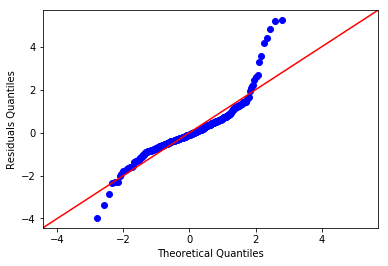

In [52]:
#Q-Q plot for residuals 
res_5 = m_5.resid
sm.qqplot(res_5, fit= True, line ='45')
plt.ylabel("Residuals Quantiles")
plt.show()

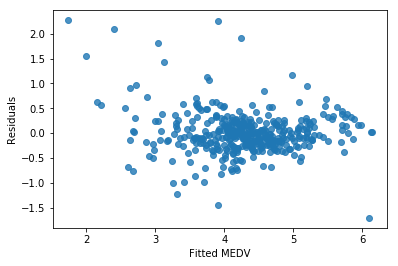

In [53]:
fitted_5 =m_5.fittedvalues 
sns.regplot(x= fitted_5, y= res_5, fit_reg = False)
plt.xlabel('Fitted MEDV')
plt.ylabel('Residuals')
plt.show();

In [54]:
#  now everything p-value < 0.05 level, but still residuals plots doesnt look good, and VIF large
# take transformation for X predictors 

In [55]:
# Nothing to drop, so let's transform CRIM, NOX, RM, B and LSTAT, same number of parameters with 5
m_6 = ols("""MEDV ~ np.log(CRIM)+ CHAS + np.log(NOX) + np.log(RM) + np.log(B) + np.log(LSTAT) 
        + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7+ RAD_8 + RAD_24 - 1""", train).fit()
print(m_6.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     3049.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:53:00   Log-Likelihood:                -219.88
No. Observations:                 405   AIC:                             467.8
Df Residuals:                     391   BIC:                             523.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
np.log(CRIM)     -0.0031      0.027     -0.112

In [56]:
y_6, X_6 = dmatrices("""MEDV ~ np.log(CRIM)+ CHAS + np.log(NOX) + np.log(RM) + np.log(B) + np.log(LSTAT) 
        + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7+ RAD_8 + RAD_24 - 1""", train, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X_6.values, i) for i in range(X_6.shape[1])]
vif["features"] = X_6.columns
display(vif)

VIF Factor       features
0     8.487306   np.log(CRIM)
1     1.155395           CHAS
2    37.021117    np.log(NOX)
3   101.508428     np.log(RM)
4    56.560279      np.log(B)
5    21.496149  np.log(LSTAT)
6     2.380510          RAD_2
7     3.009682          RAD_3
8     8.581564          RAD_4
9     8.069502          RAD_5
10    2.733313          RAD_6
11    2.341267          RAD_7
12    3.257617          RAD_8
13   17.005722         RAD_24

In [57]:
#Drop np.log(NOX) due to big p and big VIF
#Jessica 

In [58]:
m_7 = ols("""MEDV ~ np.log(CRIM)+ CHAS  + np.log(RM) + np.log(B) + np.log(LSTAT) 
        + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7+ RAD_8 + RAD_24 - 1""", train).fit()
print(m_7.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     3276.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:53:01   Log-Likelihood:                -220.86
No. Observations:                 405   AIC:                             467.7
Df Residuals:                     392   BIC:                             519.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
np.log(CRIM)     -0.0252      0.022     -1.144

In [59]:
anova_lm(m_7, m_6) #cannot reject reduced, drop np.log()

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


df_resid        ssr  df_diff   ss_diff        F    Pr(>F)
0     392.0  70.574043      0.0       NaN      NaN       NaN
1     391.0  70.235372      1.0  0.338671  1.88538  0.170511

In [60]:
y_7, X_7 = dmatrices("""MEDV ~ np.log(CRIM)+ CHAS  + np.log(RM) + np.log(B) + np.log(LSTAT) 
        + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7+ RAD_8 + RAD_24 - 1""", train, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X_7.values, i) for i in range(X_7.shape[1])]
vif["features"] = X_7.columns
display(vif)

VIF Factor       features
0     5.522153   np.log(CRIM)
1     1.134591           CHAS
2    82.023125     np.log(RM)
3    56.384506      np.log(B)
4    21.435640  np.log(LSTAT)
5     2.380502          RAD_2
6     2.934568          RAD_3
7     8.389852          RAD_4
8     8.060448          RAD_5
9     2.728632          RAD_6
10    2.268786          RAD_7
11    3.181081          RAD_8
12   16.642509         RAD_24

In [61]:
#Comment as before 

In [62]:
# Drop all RAD 
m_8 = ols("""MEDV ~ np.log(CRIM)+ CHAS  + np.log(RM) + np.log(B) + np.log(LSTAT) 
        - 1""", train).fit()
print(m_8.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     8243.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:53:01   Log-Likelihood:                -231.49
No. Observations:                 405   AIC:                             473.0
Df Residuals:                     400   BIC:                             493.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
np.log(CRIM)     -0.0404      0.013     -3.144

In [63]:
anova_lm(m_8,m_7) # reject, but RAD_24 is pretty big, we could go with it 

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


df_resid        ssr  df_diff   ss_diff        F    Pr(>F)
0     400.0  74.377956      0.0       NaN      NaN       NaN
1     392.0  70.574043      8.0  3.803913  2.64108  0.007885

In [64]:
y_8, X_8 = dmatrices("""MEDV ~ np.log(CRIM)+ CHAS + np.log(RM) + np.log(B) + np.log(LSTAT) 
        - 1""", train, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X_8.values, i) for i in range(X_8.shape[1])]
vif["features"] = X_8.columns
display(vif)

VIF Factor       features
0    1.823481   np.log(CRIM)
1    1.105473           CHAS
2   54.237878     np.log(RM)
3   54.782690      np.log(B)
4   19.057059  np.log(LSTAT)

In [65]:
#comment something like before

In [66]:
# drop np.log(B) because high VIF 
m_9 = ols("""MEDV ~ np.log(CRIM)+ CHAS + np.log(RM)  + np.log(LSTAT) - 1""", train).fit()
print(m_9.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9377.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:53:01   Log-Likelihood:                -250.88
No. Observations:                 405   AIC:                             509.8
Df Residuals:                     401   BIC:                             525.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
np.log(CRIM)     -0.0699      0.013     -5.575

In [67]:
y_9, X_9 = dmatrices("""MEDV ~ np.log(CRIM)+ CHAS + np.log(RM)  + np.log(LSTAT) - 1""", train, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X_9.values, i) for i in range(X_9.shape[1])]
vif["features"] = X_9.columns
display(vif)

VIF Factor       features
0    1.583641   np.log(CRIM)
1    1.097585           CHAS
2   19.345267     np.log(RM)
3   17.410992  np.log(LSTAT)

In [68]:
#some VIF pretty big
#let's add interactions of np.log(RM)with np.log(lSTAT) without adding the original np.log(RM) and np.log(LSTAT)

In [69]:
m_10= ols("""MEDV ~ np.log(CRIM)+ CHAS + np.log(RM):np.log(LSTAT) - 1""", train).fit()
print(m_10.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1522.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):          5.25e-219
Time:                        17:53:01   Log-Likelihood:                -662.95
No. Observations:                 405   AIC:                             1332.
Df Residuals:                     402   BIC:                             1344.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
np.log(CRIM)            

In [70]:
y_10, X_10 = dmatrices("""MEDV ~ np.log(CRIM)+ CHAS + np.log(RM):np.log(LSTAT) - 1""", train, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X_10.values, i) for i in range(X_10.shape[1])]
vif["features"] = X_10.columns
display(vif)

VIF Factor                  features
0    1.037531              np.log(CRIM)
1    1.060592                      CHAS
2    1.098371  np.log(RM):np.log(LSTAT)

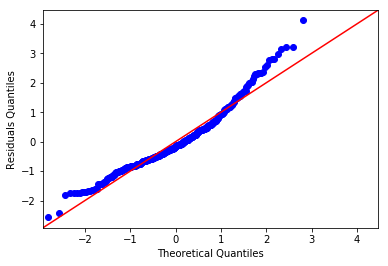

In [71]:
#seems pretty valid, let's see residual plots 
res_10 = m_10.resid
sm.qqplot(res_10, fit= True, line ='45')
plt.ylabel("Residuals Quantiles")
plt.show()

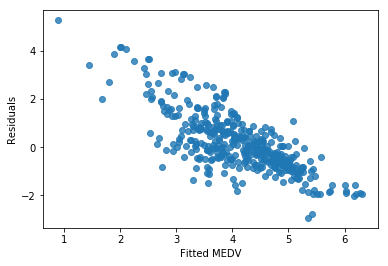

In [72]:
# residuals vs fitted values 
fitted_10=m_10.fittedvalues 
sns.regplot(x= fitted_10, y= res_10, fit_reg = False)
plt.xlabel('Fitted MEDV')
plt.ylabel('Residuals')
plt.show();

In [73]:
#residual trend is too much, adjusted R2 decrease much 
#let's transform the variables it back 

## Final Model Chosen 

In [74]:
m_11=ols("""MEDV ~ CRIM+ CHAS + RM + LSTAT - 1""", train).fit()
print(m_11.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     8068.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:53:01   Log-Likelihood:                -280.99
No. Observations:                 405   AIC:                             570.0
Df Residuals:                     401   BIC:                             586.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0227      0.003     -7.654      0.0

In [75]:
y_11, X_11 = dmatrices("""MEDV ~ CRIM+ CHAS + RM + LSTAT - 1""", train, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X_11.values, i) for i in range(X_11.shape[1])]
vif["features"] = X_11.columns
display(vif)

VIF Factor features
0    1.409430     CRIM
1    1.083850     CHAS
2    3.476325       RM
3    4.011183    LSTAT

In [76]:
#looks good so far 

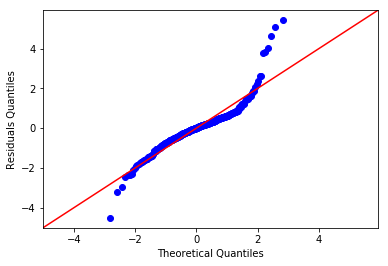

In [77]:
res_11 = m_11.resid
sm.qqplot(res_11, fit= True, line ='45')
plt.ylabel("Residuals Quantiles")
plt.show()

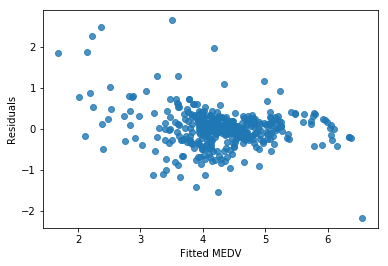

In [78]:
# residuals vs fitted values 
fitted_11=m_11.fittedvalues 
sns.regplot(x= fitted_11, y= res_11, fit_reg = False)
plt.xlabel('Fitted MEDV')
plt.ylabel('Residuals')
plt.show();

In [79]:
#better, let's test

In [80]:
# Test 
m_11_test= ols("""MEDV ~ CRIM + CHAS + RM + LSTAT - 1""", test).fit()
print(m_11_test.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2190.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):           4.05e-94
Time:                        17:53:02   Log-Likelihood:                -67.171
No. Observations:                 101   AIC:                             142.3
Df Residuals:                      97   BIC:                             152.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0059      0.009     -0.631      0.5

In [81]:
# coefficients doesnt change signs, relatively close on the validation set to on the train set, valid enough
# however, significance of CRIM and CHAs change
# now let's identify if influential points causes the residual plots not nice 

## Influential Point Diagonostic 

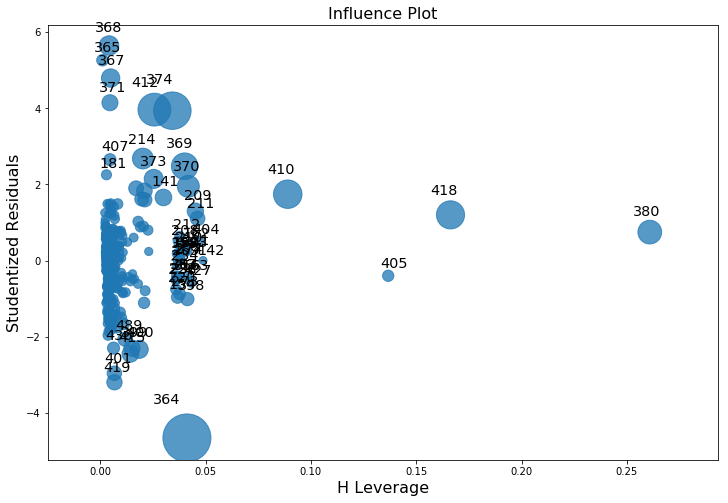

In [82]:
#Identify influential points
fig, ax = plt.subplots(figsize=(12,8))
sm.graphics.influence_plot(m_11, ax=ax, criterion="cooks");

In [83]:
#student residuals >+- 2.5, outliers in y,
#influential by cooks > 50th quantile F(p,n-p)
#DFFITS > 2*sqrt(p/n) 
#and DFBETAS >  2/sqrt(n) A DFBETA value in excess of 2/sqrt(n) merits further investigation
#statistics such as residuals, leverage, Cook's D and DFITS, that assess the overall impact of an observation on the regression results,
#and statistics such as DFBETA that assess the specific impact of an observation on the regression coefficients.
#Jing

In [84]:
#calculate critical values for leverages, cook's distance and dffits to see how many are potential influential
#hat_c = 2p/n= 2*4/405 = 0.0198
#cooks_c = 50th quantile F(p,n-p) = 0.84 
#dffits_c = 2*sqrt(p/n) = 2* sqrt(4/405) = 0.198
#dfbetas_c = 2/sqrt(n)= 0.1  

In [85]:
#how many points are potentially influential 
from statsmodels.stats.outliers_influence import OLSInfluence
inf = OLSInfluence(m_11)
df_inf = inf.summary_frame()
print(df_inf.shape)
display(df_inf.head())
#take out the potential influential points index 
hatlist = df_inf.index[df_inf.hat_diag > 0.0198].tolist()
cookslist = df_inf.index[df_inf.cooks_d > 0.84].tolist()
dffitslist = df_inf.index[df_inf.dffits > 0.198].tolist()
treslist = df_inf.index[abs(df_inf.student_resid) > 2.5].tolist() #y outliers
# dfbetas
crimlist = df_inf.index[abs(df_inf['dfb_CRIM'])> 0.1].tolist()
chaslist = df_inf.index[abs(df_inf.dfb_CHAS) > 0.1].tolist()
rmlist = df_inf.index[abs(df_inf['dfb_RM']) > 0.1].tolist()
lstatlist = df_inf.index[abs(df_inf['dfb_LSTAT']) > 0.1].tolist()
#exclusions using different criteria 
print(sorted(hatlist))
print(sorted(cookslist))
print(sorted(dffitslist))
print(sorted(treslist))
print(sorted(crimlist))
print(sorted(chaslist))
print(sorted(rmlist))
print(sorted(lstatlist))

(405, 10)


dfb_CRIM  dfb_CHAS    dfb_RM  dfb_LSTAT   cooks_d    dffits  \
207 -0.047181 -0.015401 -0.015275   0.065797  0.002060  0.090844   
13  -0.000640 -0.001288  0.003857  -0.001427  0.000006  0.004764   
22   0.024808  0.009760  0.007277  -0.037924  0.000739 -0.054352   
369  0.114477  0.456877  0.118091  -0.159252  0.063325  0.506506   
444 -0.016119  0.006299  0.022472  -0.041960  0.001093 -0.066083   

     dffits_internal  hat_diag  standard_resid  student_resid  
207         0.090782  0.005315        1.241974       1.242818  
13          0.004770  0.002863        0.089014       0.088904  
22         -0.054382  0.005234       -0.749696      -0.749286  
369         0.503290  0.040097        2.462507       2.478244  
444        -0.066123  0.008350       -0.720582      -0.720149

[8, 48, 141, 142, 152, 154, 160, 162, 163, 208, 209, 210, 211, 212, 214, 220, 221, 222, 234, 236, 269, 273, 274, 277, 283, 356, 357, 358, 363, 364, 369, 370, 373, 374, 380, 384, 386, 387, 398, 404, 405, 410, 412, 418, 427, 438, 490]
[]
[141, 147, 148, 209, 211, 214, 367, 368, 369, 370, 371, 373, 374, 380, 384, 386, 410, 412, 418]
[214, 364, 365, 367, 368, 371, 374, 401, 407, 412, 419]
[141, 148, 214, 364, 367, 368, 369, 370, 371, 380, 386, 398, 400, 401, 405, 407, 410, 412, 415, 418, 427, 436, 489]
[154, 209, 211, 212, 220, 273, 364, 369, 370]
[141, 147, 148, 157, 209, 214, 364, 368, 369, 370, 371, 373, 374, 384, 386, 399, 410, 412, 415, 489]
[8, 48, 141, 144, 147, 148, 209, 211, 214, 364, 368, 369, 370, 371, 373, 374, 380, 384, 386, 388, 399, 400, 410, 412, 415, 418, 419, 437, 438, 489, 490, 496]


In [86]:
#choose the dffits as the criteria and remove the influential points
#take the common set, appearing at least 4 dfbetas, and dffits and all y outliers
idx = [141, 147, 148, 214, 364, 365, 367, 368, 369, 370, 371, 373, 374, 380, 384, 386, 401, 407, 410, 412, 415, 418, 419, 489]
bad_train = train.index.isin(idx)
train_clean= train[~bad_train]
train_clean.shape

(381, 21)

In [87]:
#fit on removing influential data  
m_11_clean= ols("""MEDV ~ CRIM + CHAS+ RM + LSTAT - 1""", train_clean).fit()
print(m_11_clean.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.735e+04
Date:                Wed, 25 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:53:04   Log-Likelihood:                -109.16
No. Observations:                 381   AIC:                             226.3
Df Residuals:                     377   BIC:                             242.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0352      0.003    -11.858      0.0

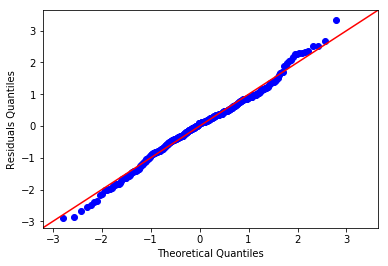

In [88]:
res_11_clean = m_11_clean.resid
sm.qqplot(res_11_clean, fit= True, line ='45')
plt.ylabel("Residuals Quantiles")
plt.show()

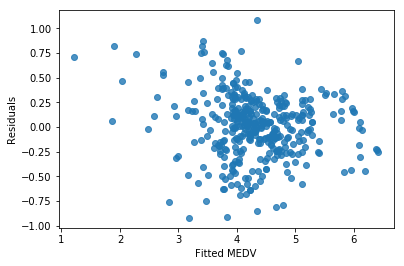

In [89]:
fitted_11_clean=m_11_clean.fittedvalues 
sns.regplot(x= fitted_11_clean, y= res_11_clean, fit_reg = False)
plt.xlabel('Fitted MEDV')
plt.ylabel('Residuals')
plt.show();

In [90]:
#k-s test for residual normality
from statsmodels.stats.diagnostic import kstest_normal
print(kstest_normal(res_11_clean, pvalmethod='approx')) 

(0.04290935170285426, 0.08888360857352029)


In [91]:
#can't reject normality null hypothesis at level 0.05 

In [92]:
from statsmodels.compat import lzip
#Heteroskedasticity tests
#One of the main assumptions for the ordinary least squares regression is the homogeneity of variance of the residuals. 
#Breush-Pagan test: (constant variance test)
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test_s= sms.het_breuschpagan(res_11_clean, m_11_clean.model.exog)
lzip(name, test_s)

[('Lagrange multiplier statistic', 157.32304321366865),
 ('p-value', 6.931163367018726e-34),
 ('f-value', 66.29067667910249),
 ('f p-value', 1.976831472422458e-42)]

In [93]:
# Comment on Breush-Pagan test results
#Jing 

In [94]:
#rainbow test for Null hypothesis that linearity is correct 
from statsmodels.stats.diagnostic import linear_rainbow
name = ['F value', 'p value']
test_s = linear_rainbow(m_11_clean)
lzip(name, test_s)

[('F value', 1.090393037052474), ('p value', 0.2767998646387192)]

In [95]:
#can't reject the null hypothesis :linearity is correct 
#Jing 

In [96]:
#comment 
#Jing

RMSE on cleaned training data: 0.32224785760134933


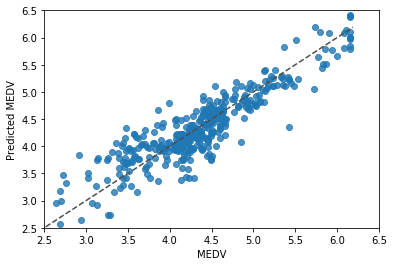

In [97]:
# predicted vs actual values on train_clean:
sns.regplot(x= train_clean.MEDV, y= fitted_11_clean, fit_reg = False)
plt.xlim(2.5,6.5)
plt.ylim(2.5,6.5)
plt.ylabel('Predicted MEDV')
plt.plot(ax.get_ylim(), ax.get_ylim(), ls="--", c=".3");
from statsmodels.tools.eval_measures import rmse
print('RMSE on cleaned training data: '+ str(rmse(train_clean.MEDV, fitted_11_clean, axis = 0)))

RMSE on test data: 0.5204506182221581


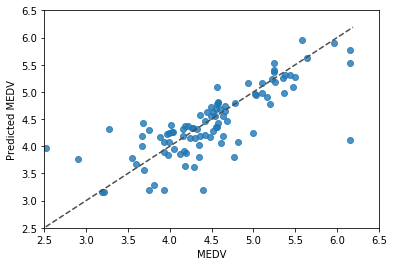

In [98]:
#finally predicted vs actual values on the validation:
sns.regplot(x= test.MEDV, y= m_11_clean.predict(test.drop('MEDV', axis =1)), fit_reg = False)
plt.xlim(2.5,6.5)
plt.ylim(2.5,6.5)
plt.ylabel('Predicted MEDV')
plt.plot(ax.get_ylim(), ax.get_ylim(), ls="--", c=".3");
print('RMSE on test data: '+ str(rmse(test.MEDV, m_11_clean.predict(test.drop('MEDV', axis =1)), axis = 0)))

In [99]:
#comment on predictions vs actual values: all look pretty good 

In [100]:
#comment on the final model: boxcoxMEDV = CRIM + CHAS+ RM + LSTAT - 1
#Jing

In [101]:
# 1.try ridge or lasso to see the results (tick)
# 2.split into training and validation several times to see average: cross validation 

## Extra Exploration 1: 5-times Training-Validation Splits 

In [102]:
# run validation 5 times:
for i in range(5):
    train_i = train.sample(frac= 0.8,random_state= i)
    valid_i = train.drop(train_i.index)
    m_i=ols("""MEDV ~ CRIM+ CHAS + RM + LSTAT - 1""", train_i).fit()
    print('\nSplit '+ str(i+1) + ', train results:')
    print(m_i.summary())
    m_i_v=ols("""MEDV ~ CRIM+ CHAS + RM + LSTAT - 1""", valid_i).fit()
    print('\nSplit '+ str(i+1) + ', validation results:')
    print(m_i_v.summary())
    print('\nSplit '+ str(i+1)+' Comparision:')
    df_i = pd.concat([pd.DataFrame(m_i.params),pd.DataFrame(m_i_v.params)], axis= 1) #display the coefficients for training ^& val
    df_i.columns = ['Train', 'Validation']
    display(df_i)


Split 1, train results:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     6504.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):          5.51e-305
Time:                        17:53:05   Log-Likelihood:                -221.67
No. Observations:                 324   AIC:                             451.3
Df Residuals:                     320   BIC:                             466.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0234      

Train  Validation
CRIM  -0.023395   -0.009583
CHAS   0.225824    0.251170
RM     0.742380    0.768666
LSTAT -0.024317   -0.038295


Split 2, train results:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     7478.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):          1.40e-314
Time:                        17:53:05   Log-Likelihood:                -202.13
No. Observations:                 324   AIC:                             412.3
Df Residuals:                     320   BIC:                             427.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0203      

Train  Validation
CRIM  -0.020287   -0.040133
CHAS   0.187321    0.742553
RM     0.748370    0.730951
LSTAT -0.028507   -0.011762


Split 3, train results:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     6095.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):          1.58e-300
Time:                        17:53:05   Log-Likelihood:                -231.68
No. Observations:                 324   AIC:                             471.4
Df Residuals:                     320   BIC:                             486.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0224      

Train  Validation
CRIM  -0.022426   -0.028752
CHAS   0.221358    0.194463
RM     0.742488    0.759380
LSTAT -0.024989   -0.027574


Split 4, train results:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     6807.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):          4.04e-308
Time:                        17:53:05   Log-Likelihood:                -214.09
No. Observations:                 324   AIC:                             436.2
Df Residuals:                     320   BIC:                             451.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0247      

Train  Validation
CRIM  -0.024737   -0.014900
CHAS   0.209592    0.279035
RM     0.748295    0.737872
LSTAT -0.026012   -0.024534


Split 5, train results:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     6279.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):          1.41e-302
Time:                        17:53:05   Log-Likelihood:                -227.29
No. Observations:                 324   AIC:                             462.6
Df Residuals:                     320   BIC:                             477.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0226      

Train  Validation
CRIM  -0.022589   -0.043518
CHAS   0.228088    0.178086
RM     0.745893    0.759013
LSTAT -0.024199   -0.035588

## Extra Exploration 2: Robust Linear Regression 

In [103]:
from statsmodels.formula.api import rlm
m_12 = rlm("""MEDV ~ CRIM+ CHAS + RM + LSTAT - 1""", train).fit()
print(m_12.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                   MEDV   No. Observations:                  405
Model:                            RLM   Df Residuals:                      401
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 25 Apr 2018                                         
Time:                        17:53:06                                         
No. Iterations:                    25                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0239      0.002    -11.076      0.0

In [104]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF 
y_12, X_12 = dmatrices("""MEDV ~ CRIM+ CHAS + RM + LSTAT - 1""", train, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X_12.values, i) for i in range(X_12.shape[1])]
vif["features"] = X_12.columns
display(vif)

VIF Factor features
0    1.409430     CRIM
1    1.083850     CHAS
2    3.476325       RM
3    4.011183    LSTAT

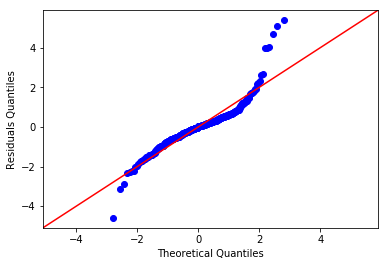

In [105]:
res_12 = m_12.resid
sm.qqplot(res_12, fit= True, line ='45')
plt.ylabel("Residuals Quantiles")
plt.show()

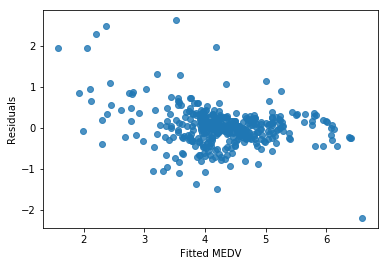

In [106]:
fitted_12=m_12.fittedvalues 
sns.regplot(x= fitted_12, y= res_12, fit_reg = False)
plt.xlabel('Fitted MEDV')
plt.ylabel('Residuals')
plt.show();

## Extra Exploration 3: Lasso Regression

In [107]:
# Confirmation of our final model, by using Lasso to perform on all avariables 
fml = """MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + TAX + PTRATIO + B + LSTAT 
        + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7+ RAD_8 + RAD_24 - 1"""
mod = OLS.from_formula(fml, train)
m_13 = mod.fit_regularized(method='elastic_net', alpha= 0.1, L1_wt=1) #alpha:lambda in regularization, L1_wt=1 is lasso

In [108]:
print(m_13.params)

CRIM      -0.014978
ZN         0.002622
INDUS      0.006079
CHAS       0.000000
NOX        0.000000
RM         0.609330
AGE        0.003086
DIS        0.000000
TAX       -0.000358
PTRATIO    0.007212
B          0.001860
LSTAT     -0.034122
RAD_2      0.000000
RAD_3      0.000000
RAD_4      0.000000
RAD_5      0.000000
RAD_6      0.000000
RAD_7      0.000000
RAD_8      0.000000
RAD_24     0.000000
dtype: float64


In [109]:
#Lasso at 0.1 gives us the result that the important variables are at lambda = 0.1 are; slight discrepancy from model 
#we choose, indicating CHAS is not that important.

## Extra notes: Scaling Data